In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
from pandas import DataFrame
import pandas as pd

from fastai.text import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path_to_zip = '/content/drive/My\ Drive/fast_ai/datasets/605165_1085454_bundle_archive.zip'

In [4]:
! unzip -q {path_to_zip} 

In [5]:
cols=['message', 'emotion']

In [6]:
train = pd.read_csv('/content/train.txt', sep=';', names=cols)

In [7]:
val = pd.read_csv('/content/val.txt', sep=';', names=cols)

In [8]:
train = train[['emotion', 'message']]
val = val[['emotion', 'message']]
train.head(), val.head()

(   emotion                                            message
 0  sadness                            i didnt feel humiliated
 1  sadness  i can go from feeling so hopeless to so damned...
 2    anger   im grabbing a minute to post i feel greedy wrong
 3     love  i am ever feeling nostalgic about the fireplac...
 4    anger                               i am feeling grouchy,
    emotion                                            message
 0  sadness  im feeling quite sad and sorry for myself but ...
 1  sadness  i feel like i am still looking at a blank canv...
 2     love                     i feel like a faithful servant
 3    anger                  i am just feeling cranky and blue
 4      joy  i can have for a treat or if i am feeling festive)

In [9]:
train_lm = pd.concat([train, val], ignore_index=True)
train_lm.head()

,emotion,message
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [10]:
path = Path('/content/')
path

PosixPath('/content')

In [ ]:
train_data = TextClasDataBunch.from_df(path, train_lm, val)
train_data.valid_ds

LabelList (2000 items)
x: TextList
xxbos i m feeling quite sad and sorry for myself but ill snap out of it soon,xxbos i feel like i am still looking at a blank canvas blank pieces of paper,xxbos i feel like a faithful xxunk,xxbos i am just feeling cranky and blue,xxbos i can have for a treat or if i am feeling festive
y: CategoryList
sadness,sadness,love,anger,joy
Path: /content

## **Numericalization**

In [ ]:
train_data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'i']

In [ ]:
train_data.train_ds

LabelList (16000 items)
x: TextList
xxbos i did nt feel humiliated,xxbos i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,xxbos i m grabbing a minute to post i feel greedy wrong,xxbos i am ever feeling nostalgic about the fireplace i will know that it is still on the property,xxbos i am feeling grouchy
y: CategoryList
sadness,sadness,anger,love,anger
Path: /content

In [11]:
data = (TextList.from_df(train_lm, path, cols='message').split_by_rand_pct(0.1).label_for_lm().databunch(bs=50))

In [12]:
data.valid_ds

LabelList (1800 items)
x: LMTextList
xxbos i did nt feel threatened or concerned really but i was nt entirely happy about the situation either perhaps xxunk because i m usually quite prepared even pleased to speak to a xxunk by,xxbos i had to take them out for a while leaving me feeling even more distressed,xxbos i get ready to blog i feel so boring,xxbos i am an xxunk a very strong xxunk feeling person you could say i am xxunk emotional about even the most insignificant of things,xxbos i am feeling naughty with my xxunk xxunk xxunk naughty xxunk a href http
y: LMLabelList
,,,,
Path: /content

In [13]:
data.show_batch()

idx,text
0,little burdened lately was nt sure why that was xxbos i ve been taking or xxunk or times xxunk amount and i ve fallen asleep a lot faster but i also feel like so funny xxbos i feel as confused about life as a teenager or as jaded as a year old man xxbos i have been with xxunk for years i feel that xxunk has xxunk well and made
1,those high school feelings and the longing with which i watched the olympic runners i feel st xxbos i did nt say was that strong feelings always make me skeptical at first xxbos i want to talk to you about but with the limited time we have on the phone and with our current xxunk i feel hesitant to bring it up xxbos i am beginning to feel that there
2,xxbos i asked him what was making him feel so fabulous and he said i m healthy my family is healthy and we live in a free country xxbos i woke up feeling incredibly content amp optimistic today however i woke up with a terrible cold and a complete lack of energy xxbos i m feeling a combination of terrified and relieved xxbos i really feel i was wronged as
3,them and show the world what a neurotic freak he was is xxbos i smoothly hand her a twenty feeling smug that they are both interested xxbos i did see some things that i would never have done myself for the movie xxunk but feel that if i did not read the book it would not have bothered me xxbos i feel like its the perfect time to xxunk some
4,i am feeling very anxious about going to therapy w xxbos i feel angry thinking how much the government has xxunk away over money xxbos i am feeling a bit adventurous i put on red lipstick xxunk artist and intense from make up for ever xxbos i have no idea why this particular region seems to lack a visibly necessary outer xxunk as well and i feel actually somewhat bothered


In [ ]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


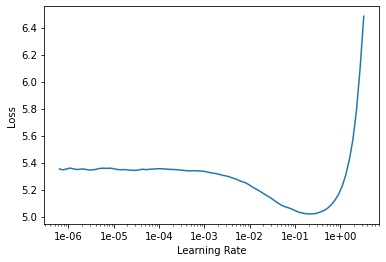

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.281107,3.981731,0.275844,00:08


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.927109,3.907760,0.289013,00:11
1,3.846792,3.855213,0.296208,00:11
2,3.731499,3.836283,0.297948,00:11
3,3.534709,3.855723,0.298338,00:11
4,3.287730,3.909579,0.291273,00:11
5,2.994988,3.999800,0.285273,00:11
6,2.730316,4.099633,0.279636,00:11
7,2.510152,4.188594,0.277974,00:11
8,2.376691,4.241636,0.276130,00:11
9,2.301216,4.264119,0.273688,00:11


In [ ]:
learn.save('lang-model')

In [ ]:
learn.load('lang-model')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (16200 items)
x: LMTextList
xxbos i did nt feel humiliated,xxbos i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,xxbos i m grabbing a minute to post i feel greedy wrong,xxbos i am ever feeling nostalgic about the fireplace i will know that it is still on the property,xxbos i ve been feeling a little burdened lately was nt sure why that was
y: LMLabelList
,,,,
Path: /content;

Valid: LabelList (1800 items)
x: LMTextList
xxbos i said without emotion while feeling a freaked out fearful anxiety welling up in my chest,xxbos i have faith but don t feel convinced that its if i am on here asking questions,xxbos i ve always been very nervous to do something like that as i feel like i am not really that talented to enter something into an official xxunk,xxbos i am feeling a bit restless these days,xxbos i was already feeling mentally crappy and it was just ridiculous
y: LMLabelLis

In [ ]:
learn.predict('I am sorry', 20, temperature=1.1, min_p=0.001)

'I am sorry you are a good way of feeling but then my mum will forget this talk about the bad mom xxbos'

In [ ]:
learn.export('emotions.pkl')

In [ ]:
src = '/content/emotions.pkl' 
dest = '/content/drive/My\ Drive/fast_ai/export_files'

In [ ]:
! cp {src} {dest}

## **Classifier**

In [15]:
path_to_pkl = '/content/drive/My\ Drive/fast_ai/export_files/emotions.pkl'

In [16]:
! cp {path_to_pkl} '/content/'